In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import scipy.io as sio
import keras
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout, Activation
from keras.optimizers import SGD
from keras.initializers import random_uniform
from sklearn.model_selection import train_test_split
#from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

path="/content/drive/MyDrive/dataset em wise/"
import numpy as np
X=np.load(path+'X.npy')
y=np.load(path+'Y.npy')
y=y.astype('int')
nClass=6

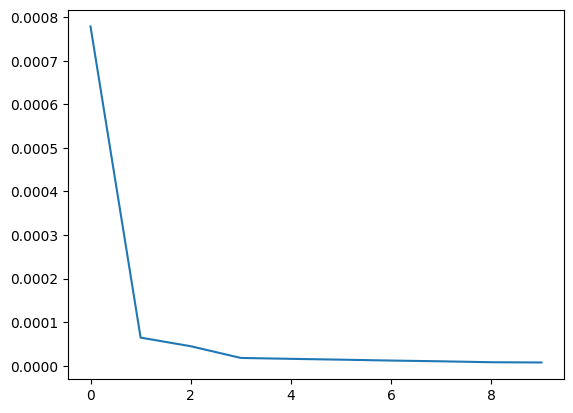

In [ ]:
X.shape
plt.plot(X[45,0:10])

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import scipy.io as sio
import keras
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout, Activation
from keras.optimizers import SGD
from keras.initializers import random_uniform
from sklearn.model_selection import train_test_split
#from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Define the 1D CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(32, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(48, kernel_size=3, activation='tanh', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(48, kernel_size=3, activation='tanh'),
        layers.MaxPooling1D(pool_size=2),
        # layers.Conv1D(32, kernel_size=3, activation='tanh'),
        # layers.MaxPooling1D(pool_size=2),
        # layers.Conv1D(16, kernel_size=3, activation='tanh'),
        # layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='tanh'),
        layers.Dropout(0.25),
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.25),
        # layers.Dense(32, activation='tanh'),
        # layers.Dropout(0.25),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the CNN model
sequence_length=X.shape[1]
num_classes=6
input_shape = (sequence_length, 1)
model = create_cnn_model(input_shape, num_classes)

model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='Adam', loss='crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
pred=model.predict(X_test)
pred = np.argmax(pred,axis=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6085 - loss: 1.0692 - val_accuracy: 0.6911 - val_loss: 0.6277
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6814 - loss: 0.7410 - val_accuracy: 0.6911 - val_loss: 0.6142
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7113 - loss: 0.6772 - val_accuracy: 0.7556 - val_loss: 0.5419
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7565 - loss: 0.6209 - val_accuracy: 0.7622 - val_loss: 0.4978
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7492 - loss: 0.6021 - val_accuracy: 0.7622 - val_loss: 0.5007
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7314 - loss: 0.6056 - val_accuracy: 0.7733 - val_loss: 0.4681
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7627 - loss: 0.5397 - val_accuracy: 0.7900 - val_loss: 0.4461
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7882 - loss: 0.5041 - val_acc

In [ ]:
import pickle
pickle.dump(model, open('CNN_nEm_Est', 'wb'))

In [ ]:
#Compute Classwise Precision Recall, f1, Accuracy
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.9266055 , 1.        , 0.9273743 , 0.53787879, 0.51428571,
       0.97619048])

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, classification_report
f1=f1_score(y_test,pred, average='macro')
prec=precision_score(y_test,pred,average='macro')
rec=recall_score(y_test,pred,average='macro')
target_names = ['nEm3', 'nEm4', 'nEm5', 'nEm6', 'nEm8','nEm9']
print(classification_report(y_test,pred, target_names=target_names,digits=4))
print(f1,prec,rec)

              precision    recall  f1-score   support

        nEm3     0.9712    0.9266    0.9484       109
        nEm4     0.9652    1.0000    0.9823       277
        nEm5     0.7313    0.9274    0.8177       179
        nEm6     0.8987    0.5379    0.6730       132
        nEm8     0.7200    0.5143    0.6000        35
        nEm9     0.9213    0.9762    0.9480       168

    accuracy                         0.8856       900
   macro avg     0.8679    0.8137    0.8282       900
weighted avg     0.8919    0.8856    0.8788       900

0.8282204936348095 0.867945110906752 0.8137224641030186


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.weights.h5")

In [ ]:
import numpy as np
from scipy.io import loadmat, savemat

# Load the Urban image data
data = loadmat('/content/new.mat')  # Update with your file path
#Z = data['X']  # Replace 'Y' with the correct key if different
Z = data['data']
#Z = data['V']
#Z=data['ppF1Image']


In [ ]:
Z.shape

(137, 187, 155)

In [ ]:
# Convert to double (float64)
image_array_double = Z.astype(np.float64) # Changed 'image_array' to 'Z'

print(image_array_double.dtype)  # Should print 'float64'


float64


In [ ]:
image_array_double.shape

(137, 187, 155)

In [ ]:
import numpy as np
from scipy.io import loadmat, savemat

# Load the Urban image data
#data = loadmat('/content/MofField.mat')  # Update with your file path
#Z = data['MoffField']  # Replace 'Y' with the correct key if different
Z=image_array_double
Z.shape

(137, 187, 155)

In [ ]:
[n1,n2,n3]=np.shape(Z)
ZRes=np.reshape(Z,(n1*n2,n3))
ZRes.shape
#ZData=np.transpose(Z)
ZData=np.transpose(ZRes)
ZData.shape

(155, 25619)

In [ ]:
n3

155

In [ ]:
X1=ZData
X=np.transpose(X1)
X.shape


(25619, 155)

**FCM_HENRY DATA**

In [ ]:
!pip install scikit-fuzzy

import skfuzzy as fuzz

# Set number of clusters (equal to expected endmembers)
n_clusters = 6 # Change as needed

# Apply Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
)

print("Fuzzy C-Means Clustering Completed!")

Fuzzy C-Means Clustering Completed!


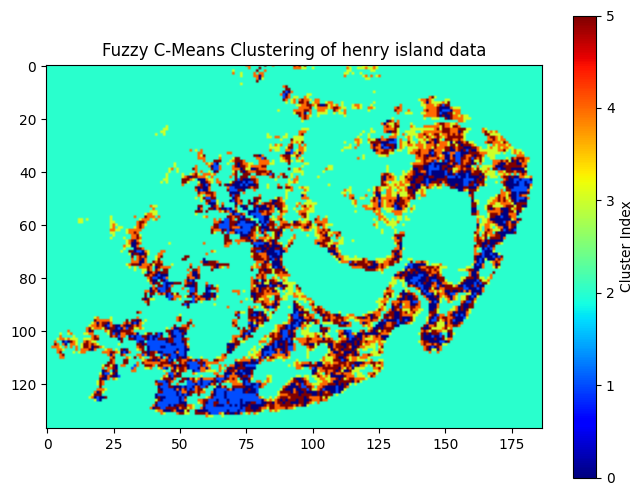

In [ ]:
# Get cluster index with highest membership
#H, W, B = 137, 187, 155
cluster_map = np.argmax(u, axis=0)

# Reshape to original image size
cluster_image = cluster_map.reshape(n1, n2)

# Display Clustering Results
plt.figure(figsize=(8, 6))
plt.imshow(cluster_image, cmap='jet')
plt.colorbar(label="Cluster Index")
plt.title("Fuzzy C-Means Clustering of henry island data")
plt.show()

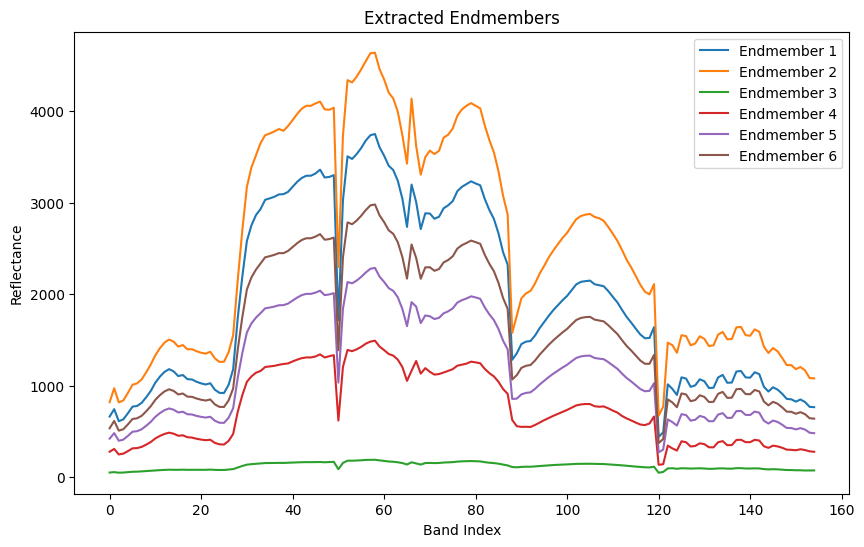

In [ ]:
# Plot the extracted endmembers
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.plot(cntr[i], label=f"Endmember {i+1}")

plt.xlabel("Band Index")
plt.ylabel("Reflectance")
plt.title("Extracted Endmembers")
plt.legend()
plt.show()

In [ ]:
# Calculate the covariance matrix
ZCOV = np.cov(ZData)
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(ZCOV)
# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
# Extract the first 100 eigenvalues
Top100EigenValues = sorted_eigenvalues[:100]
# Save the top 100 eigenvalues to a .mat file
i = 1  # Set your desired index value
filename = f"{i}.mat"
savemat(filename, {'Top100EigenValues': Top100EigenValues})

print(f"Top 100 eigenvalues saved to {filename}")

Top 100 eigenvalues saved to 1.mat


In [ ]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('1.mat')

# Extract the top 100 eigenvalues
Top100EigenValues = data['Top100EigenValues']

X=np.transpose(Top100EigenValues)

print(f"Shape of loaded data: {X.shape}")

Shape of loaded data: (100, 1)


In [ ]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('1.mat')

# Extract the top 100 eigenvalues
Top100EigenValues = data['Top100EigenValues']

# Convert to real values if they are complex
if np.iscomplexobj(Top100EigenValues):
    Top100EigenValues = Top100EigenValues.real

X = np.transpose(Top100EigenValues)

print(f"Shape of loaded data: {X.shape}")

# Reshape X to have the expected shape (num_samples, sequence_length, num_features)
X = X.reshape(1, X.shape[0], 1)  # Reshape to (1, 100, 1)
# Ensure X is of type float32
X = X.astype(np.float32)

# Make predictions
predictions = loaded_model.predict(X)

Shape of loaded data: (100, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [ ]:
predictions.argmax()

5

In [ ]:
from sklearn.decomposition import PCA

# Reshape data for PCA
rows, cols, bands = Z.shape
data_reshaped = Z.reshape(-1, bands)

# Apply PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_reshaped)

# Reshape PCA results back to spatial dimensions
data_pca_image = data_pca.reshape(rows, cols, -1)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarity of each pixel with the mean spectrum
mean_spectrum = np.mean(ZRes, axis=0)
similarity = cosine_similarity(ZRes, mean_spectrum.reshape(1, -1)).flatten()

# Select the top N most pure pixels as endmembers
top_indices = np.argsort(-similarity)[:num_classes]  # Get indices of top-N pure pixels
endmember_locations = [(idx // cols, idx % cols) for idx in top_indices]

# Print endmember locations
print("Endmember locations (row, col):", endmember_locations)


Endmember locations (row, col): [(129, 69), (127, 71), (123, 72), (126, 78), (125, 67), (74, 114)]
